In [4]:
import numpy as np #importing essentials
import pandas as pd
import random
import math
from sklearn.cluster import KMeans

In [5]:
def get_dataset_diff(z1): #method for creating the dataset
    writer1 = []
    writer2 = []
    feat_id = []
    x = []
    y = []
    target = []
    diff_pair = pd.read_csv(z1)
    feat = pd.read_csv("HumanObserved-Features-Data/HumanObserved-Features-Data.csv")
    feat_id = feat.img_id
    x = diff_pair.img_id_A #seperating the columns from dataset
    y = diff_pair.img_id_B #same as above
    tar = diff_pair.target #same as above
    
    for i in range(0, 790):
        a = random.randint(1, 293031)
        writer1.append(x.iloc[a])  #choosing randoms samples
        writer2.append(y.iloc[a])
        target.append(tar.iloc[a])
    l1 = []
    l2 = []

    for i in range(len(writer1)):
        for j in range(len(feat_id)): 
            if(writer1[i] == feat_id[j]): #comparing the sample and fetching their features
                l1.append(feat.iloc[j, 2:11])
            if(writer2[i] == feat_id[j]):
                l2.append(feat.iloc[j, 2:11])   
    feat_mat_sub = np.zeros([790, 9])
    feat_mat_con = np.zeros([790, 18])
    l1 = np.array(l1).reshape(790, 9)
    l2 = np.array(l2).reshape(790, 9)
    for k in range(0, 790):
        for m in range(0, 9):
            feat_mat_sub[k][m] = abs(l1[k][m] - l2[k][m])  #feature subtraction
    feat_mat_sub = np.array(feat_mat_sub).reshape(790, 9)
    feat_mat_con = np.concatenate((l1, l2), axis=1)  #feature concatenation
    targ = np.array(target).reshape(790, 1) 
    print(feat_mat_sub.shape)
    print(feat_mat_con.shape)
    print(targ.shape)
    return feat_mat_sub, feat_mat_con, targ
###############################################################################################################################
def get_dataset_same(z1): #dataset create for same pairs
    writer1 = []
    writer2 = []
    feat_id = []
    x = []
    y = []
    target = []
    diff_pair = pd.read_csv(z1)
    feat = pd.read_csv("HumanObserved-Features-Data/HumanObserved-Features-Data.csv")
    feat_id = feat.img_id
    x = diff_pair.img_id_A
    y = diff_pair.img_id_B
    tar = diff_pair.target
    for i in range(0, 790):
        writer1.append(x.iloc[i])
        writer2.append(y.iloc[i])
        target.append(tar.iloc[i])
    l1 = []
    l2 = []

    for i in range(len(writer1)):
        for j in range(len(feat_id)):
            if(writer1[i] == feat_id[j]):
                l1.append(feat.iloc[j, 2:11])
            if(writer2[i] == feat_id[j]):
                l2.append(feat.iloc[j, 2:11]) 
    feat_mat_sub = np.zeros([790, 9], dtype=float)
    feat_mat_con = np.zeros([790, 18], dtype=float)
    l1 = np.array(l1).reshape(790, 9)
    l2 = np.array(l2).reshape(790, 9)
    for k in range(0, 790):
        for m in range(0, 9):
            feat_mat_sub[k][m] = abs(l1[k][m] - l2[k][m])
    feat_mat_sub = np.array(feat_mat_sub).reshape(790, 9)
    feat_mat_con = np.concatenate((l1, l2), axis=1)
    targ = np.array(target).reshape(790, 1)
    print(feat_mat_sub.shape)
    print(feat_mat_con.shape)
    print(targ.shape)
    return feat_mat_sub, feat_mat_con, targ



In [6]:
def get_dataset_diff_gsc(z1, nj): #dataset create for gsc dataset using same technique as above
    writer1 = []
    writer2 = []
    feat_id = []
    x = []
    y = []
    target = []
    diff_pair = pd.read_csv(z1)
    feat = pd.read_csv("GSC-Features-Data/GSC-Features.csv")
    feat_id = feat.img_id
    x = diff_pair.img_id_A
    y = diff_pair.img_id_B
    tar = diff_pair.target
    print(len(x))
    if(nj == 0):
        for i in range(0, 2000):
            a = random.randint(1, 762557)
            writer1.append(x.iloc[a])
            writer2.append(y.iloc[a])
            target.append(tar.iloc[a])
    else:
        for i in range(0, 2000):
            a = random.randint(1, 71532)
            writer1.append(x.iloc[a])
            writer2.append(y.iloc[a])
            target.append(tar.iloc[a])
    l1 = []
    l2 = []

    for i in range(len(writer1)):
        for j in range(len(feat_id)):
            if(writer1[i] == feat_id[j]):
                l1.append(feat.iloc[j, 1:513])
            if(writer2[i] == feat_id[j]):
                l2.append(feat.iloc[j, 1:513])   
    feat_mat_sub = np.zeros([2000, 512], dtype=np.float32)
    feat_mat_con = np.zeros([2000, 512], dtype=np.float32)
    l1 = np.array(l1).reshape(2000, 512)
    l2 = np.array(l2).reshape(2000, 512)
    for k in range(0, 2000):
        for m in range(0, 512):
            feat_mat_sub[k][m] = abs(l1[k][m] - l2[k][m])
    feat_mat_sub = np.array(feat_mat_sub).reshape(2000, 512)
    feat_mat_con = np.concatenate((l1, l2), axis=1)
    targ = np.array(target).reshape(2000, 1)
    print(feat_mat_sub.shape)
    print(feat_mat_con.shape)
    print(targ.shape)
    return feat_mat_sub, feat_mat_con, targ

In [8]:
#fetching the datasets
feat_mat_sub_diff, feat_mat_con_diff, target_val_diff = get_dataset_diff("HumanObserved-Features-Data/diffn_pairs.csv")
feat_mat_sub_same, feat_mat_con_same, target_val_same = get_dataset_same("HumanObserved-Features-Data/same_pairs.csv")
feat_mat_sub_gsc_diff, feat_mat_con_gsc_diff, target_val_gsc_diff = get_dataset_diff_gsc("GSC-Features-Data/diffn_pairs.csv", 0)
feat_mat_sub_gsc_same, feat_mat_con_gsc_same, target_val_gsc_same = get_dataset_diff_gsc("GSC-Features-Data/same_pairs.csv", 1)

71531
(2000, 512)
(2000, 1024)
(2000, 1)


In [9]:
feat_mat_sub_human = np.transpose(np.concatenate((feat_mat_sub_diff, feat_mat_sub_same))) #joining human dataset for feature subtraction
feat_mat_con_human = np.transpose(np.concatenate((feat_mat_con_diff, feat_mat_con_same))) #joining human dataset for feature concat
target_val_human = np.concatenate((target_val_diff, target_val_same))

new1 = np.append(np.transpose(feat_mat_sub_human), target_val_human, 1)
#print(new1.shape)
np.random.shuffle(new1) #join target and shuffling data
target_val_human_sub = new1[:,9] #remove target
feat_mat_sub_human = np.transpose(np.delete(new1, 9, axis = 1))

new2 = np.append(np.transpose(feat_mat_con_human), target_val_human, 1)
#print(new2.shape)
np.random.shuffle(new2)
target_val_human_con = new2[:,18]
feat_mat_con_human = np.transpose(np.delete(new2, 18, axis = 1))
#################################################################################################################################
feat_mat_sub_gsc = np.transpose(np.concatenate((feat_mat_sub_gsc_diff, feat_mat_sub_gsc_same))) #join gsc dataset feature sub
feat_mat_con_gsc = np.transpose(np.concatenate((feat_mat_con_gsc_diff, feat_mat_con_gsc_same))) #join gsc dataset feature concat
target_val_gsc = np.concatenate((target_val_gsc_diff, target_val_gsc_same))

new3 = np.append(np.transpose(feat_mat_sub_gsc), target_val_gsc, 1)
#print(new3.shape)
np.random.shuffle(new3) #shuffle data 
target_val_gsc_sub = new3[:,512]
feat_mat_sub_gsc = np.transpose(np.delete(new3, 512, axis = 1))

new4 = np.append(np.transpose(feat_mat_con_gsc), target_val_gsc, 1)
#print(new4.shapepe)
np.random.shuffle(new4)
target_val_gsc_con = new4[:,1024]
feat_mat_con_gsc = np.transpose(np.delete(new4, 1024, axis = 1))
# #target_val_human = np.array(target_val_human).reshape(-1)
# #target_val_gsc = np.array(target_val_gsc).reshape(-1)
#################################################################################################################################
print(feat_mat_sub_human.shape)
print(target_val_human_sub.shape)
print(feat_mat_con_human.shape)
print(target_val_human_con.shape)
print(feat_mat_sub_gsc.shape)
print(target_val_gsc_sub.shape)
print(feat_mat_con_gsc.shape)
print(target_val_gsc_con.shape)

# feat_mat_con_human = feat_mat_con_human.astype(float)
#feat_mat_con_gsc = feat_mat_con_gsc.astype(float)

(9, 1580)
(1580,)
(18, 1580)
(1580,)
(512, 4000)
(4000,)
(1024, 4000)
(4000,)


In [10]:
# dele = []
# for h in range(0, 1024):
#     sum1 = 0
#     for c in range(0, 1600):
#         sum1 = sum1 + feat_mat_con_gsc[h][c]
#     if(sum1 == 0):
#         dele.append(h)
# feat_mat_con_gsc = np.delete(feat_mat_con_gsc, dele, axis = 0)
# print(feat_mat_con_gsc.shape)

for i in range(0, 1024):
    feat_mat_con_gsc[i][i] = 0.01  #add noise 
        
for j in range(0, 512):
    feat_mat_sub_gsc[j][j] = 0.01 #add noise

# delet = []
# for i in range(0, 512):
#     sum = 0
#     for j in range(0, 1600):
#         sum = sum + feat_mat_sub_gsc[i][j]
#     if(sum == 0):
#         delet.append(i)     
# feat_mat_sub_gsc = np.delete(feat_mat_sub_gsc, delet, axis = 0)
# print(feat_mat_sub_gsc.shape)

In [161]:
learning_rate = 0.03
train_percent = 80
val_percent = 10
test_percent = 10
M = 10
phi = []
 
def generateTrainingData(rawData, train_percent): #training data 
    train_len = int(math.ceil(len(rawData[0])*(train_percent*0.01)))
    data_tr = rawData[:, 0:train_len]
    return data_tr

def generateTrainingTarget(rawTarget, train_percent=80): #training target
    TrainingLen = int(math.ceil(len(rawTarget)*(train_percent*0.01)))  
    t = rawTarget[:TrainingLen]
    return t

def generateValData(rawData, val_percent, TrainingCount): #validation and test data
    valSize = int(math.ceil(len(rawData[0])*val_percent*0.01))
    V_End = TrainingCount + valSize 
    dataMatrix = rawData[:, TrainingCount+1:V_End]
    return dataMatrix

def generateValTarget(rawData, val_percent, TrainingCount): #validation and test target
    valSize = int(math.ceil(len(rawData)*val_percent*0.01))
    V_End = TrainingCount + valSize
    t =rawData[TrainingCount+1:V_End]
    return t
 
def GenerateBigSigma(Data, MuMatrix,TrainingPercent): #big sigma generation
    print(len(Data))
    BigSigma    = np.zeros((len(Data),len(Data)))
    DataT       = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))       
    varVect     = []
    
    for i in range(0,len(DataT[0])):
        vct = []
        for j in range(0,int(TrainingLen)):
            vct.append(Data[i][j])
            #print(len(vct))
        varVect.append(np.var(vct))
    
    for j in range(len(Data)):
        BigSigma[j][j] = varVect[j]
    BigSigma = np.dot(200,BigSigma)
    return BigSigma
    print("Step Done")

def GetScalar(DataRow,MuRow, BigSigInv):
    R = np.subtract(DataRow,MuRow)
    T = np.dot(BigSigInv,np.transpose(R))  
    L = np.dot(R,T)
    return L

def GetRadialBasisOut(DataRow,MuRow, BigSigInv):    
    phi_x = math.exp(-0.5*GetScalar(DataRow,MuRow,BigSigInv))
    return phi_x

def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80): #design matrix generate
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))   
    PHI = np.zeros((int(TrainingLen),len(MuMatrix)))
    BigSigInv = np.linalg.inv(BigSigma) 
#     print(MuMatrix.shape)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            #print(DataT[R].shape)
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    return PHI
    print("Step Done")

def GetWeightsClosedForm(PHI, T, Lambda): #weights intialization
    Lambda_I = np.identity(len(PHI[0]))
    for i in range(0,len(PHI[0])):
        Lambda_I[i][i] = Lambda
    PHI_T       = np.transpose(PHI)
    PHI_SQR     = np.dot(PHI_T,PHI)
    PHI_SQR_LI  = np.add(Lambda_I,PHI_SQR)
    PHI_SQR_INV = np.linalg.inv(PHI_SQR_LI)
    INTER       = np.dot(PHI_SQR_INV, PHI_T)
    W           = np.dot(INTER, T)
    return W

def GetValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    return Y

def GetErms(VAL_TEST_OUT,ValDataAct): #erms method
    sum = 0.0
    t=0
    accuracy = 0.0
    counter = 0
    val = 0.0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

In [162]:
def linear_regression(dat, tar, wh, m):
    training_set = generateTrainingData(dat, train_percent) #split training data 
    training_target = np.array(generateTrainingTarget(tar, train_percent)) #split training target
    #training_target = np.transpose(training_target)
#     print(training_set.shape)
#     print(training_target.shape)

    validation_set = generateValData(dat, val_percent, len(training_target)) #split validation data
    validation_target = np.array(generateValTarget(tar, val_percent, len(training_target))) #split validation target
    #validation_target = np.transpose(validation_target)
#     print(validation_set.shape)
#     print(validation_target.shape)

    test_data = generateValData(dat, test_percent, (len(training_target)+len(validation_target))) #split testing data
    test_target = np.array(generateValTarget(tar, test_percent, (len(training_target)+len(validation_target)))) #split testing target
#     print(test_data.shape)
#     print(test_target.shape)

    C_Lambda = 0.01
    kmeans = KMeans(n_clusters=m, random_state=0).fit(np.transpose(training_set)) #clusters 
    #print("Step 1 Done")
    Mu = kmeans.cluster_centers_
    #print("Step 2 Done")
    BigSigma = GenerateBigSigma(dat, Mu, train_percent)
    #print("Step 3 Done")
    TRAINING_PHI = GetPhiMatrix(dat, Mu, BigSigma, train_percent)
    #print("Step 4 Done")
    #print("training phi" +str(TRAINING_PHI.shape))
    W = GetWeightsClosedForm(TRAINING_PHI,training_target,(C_Lambda)) 
    #print("Step 5 Done")
    W_Now = np.dot(220, W)
    #print("W_NOw shape" +str(W_Now.shape))
    La = 0.2
    learning_rate = 0.1

    L_Erms_Val   = []
    L_Erms_TR    = []
    L_Erms_Test  = []
    W_Mat        = []

    TEST_PHI     = GetPhiMatrix(test_data, Mu, BigSigma, 100) 
    VAL_PHI = GetPhiMatrix(validation_set, Mu, BigSigma, 100)
    for i in range(0,1000):

        #stochastic gradient descent
        Delta_E_D     = -np.dot((training_target[i] - np.dot(W_Now,np.transpose(TRAINING_PHI[i]))),TRAINING_PHI[i])
        La_Delta_E_W  = np.dot(La,W_Now) #Lamda . delta_e_w
        Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
        Delta_W       = -np.dot(learning_rate,Delta_E)
        W_T_Next      = W_Now + Delta_W #update weights 
        W_Now         = W_T_Next

        TR_TEST_OUT   = GetValTest(TRAINING_PHI,W_T_Next) 
        Erms_TR       = GetErms(TR_TEST_OUT,training_target)
        L_Erms_TR.append(float(Erms_TR.split(',')[1]))

        VAL_TEST_OUT  = GetValTest(VAL_PHI,W_T_Next) 
        Erms_Val      = GetErms(VAL_TEST_OUT,validation_target)
        L_Erms_Val.append(float(Erms_Val.split(',')[1]))

        TEST_OUT      = GetValTest(TEST_PHI,W_T_Next) 
        Erms_Test = GetErms(TEST_OUT,test_target)
        L_Erms_Test.append(float(Erms_Test.split(',')[1]))
        #print(i)
    
    if(wh == 0):
        print("Erms for Human-Observed Feature Subtraction")
    elif(wh == 1):
        print("Erms for Human-Observed Feature Concatenation")
    elif(wh == 2):
        print("Erms for GSC Feature Subtraction")
    else:
        print("Erms for GSC Feature Concatenation")
    print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
    print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
    print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))

In [163]:
linear_regression(feat_mat_sub_human, target_val_human_sub, 0, 8)
linear_regression(feat_mat_con_human, target_val_human_con, 1, 17)
linear_regression(feat_mat_sub_gsc, target_val_gsc_sub, 2, 12)
linear_regression(feat_mat_con_gsc, target_val_gsc_con, 3, 12)

9
Erms for Human-Observed Feature Subtraction
E_rms Training   = 0.52203
E_rms Validation = 0.53314
E_rms Testing    = 0.51717
18
Erms for Human-Observed Feature Concatenation
E_rms Training   = 0.49642
E_rms Validation = 0.49959
E_rms Testing    = 0.49571
512
Erms for GSC Feature Subtraction
E_rms Training   = 0.42101
E_rms Validation = 0.43383
E_rms Testing    = 0.41479
1024
Erms for GSC Feature Concatenation
E_rms Training   = 0.55593
E_rms Validation = 0.57592
E_rms Testing    = 0.56934


In [183]:
#Logistic Regression
def sigmoid_fun(x): #sigmoid function
    n = 1 / (1 + np.exp(-x))
    return n

def loss_fun(h, y): #loss function 
    n = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return n

def logistic_regression(X, y):
    y = np.array(y).reshape(len(y), 1)
    iteration = 1000
    learning_rate = 0.01
    sh = (X.shape[1], 1)
    weights = np.zeros(sh)
    for i in range(iteration):
        x = np.dot(X, weights) #weight.T * data
        #print(x)
        h = sigmoid_fun(x)
        gd = np.asarray(np.dot(X.T, (h - y)) / y.shape[0]) #calculating gradient descent
#         print(type(gd)) 
#         print(type(weights))
        weights -= learning_rate * gd
        #print(loss_fun(h, y))
    #print(weights)
    ctr = 0
    for i in range(X.shape[0]):
        c = np.dot(X, weights)
        y_cap = sigmoid_fun(c)
        y_cap = np.around(y_cap) #check if predicted output is same as target vector
        if(y_cap[i] == y[i]):
            ctr += 1
    acc = (ctr / X.shape[0]) * 100 #calculate accuracy
    return acc
    
print('Accuracy - Human Feature Subtraction ' + str(logistic_regression(np.transpose(feat_mat_sub_human), target_val_human_sub)))    
print('Accuracy - Human Feature Concatenation ' + str(logistic_regression(np.transpose(feat_mat_con_human), target_val_human_con)))
print('Accuracy - GSC Feature Subtraction ' + str(logistic_regression(np.transpose(feat_mat_sub_gsc), target_val_gsc_sub)))
print('Accuracy - GSC Feature Concatenation ' + str(logistic_regression(np.transpose(feat_mat_con_gsc), target_val_gsc_con)))

Accuracy - Human Feature Subtraction 52.34177215189874
Accuracy - Human Feature Concatenation 58.87569
Accuracy - GSC Feature Subtraction 73.0
Accuracy - GSC Feature Concatenation 69.25


In [14]:
#neural network
from keras.models import Sequential #essentials
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

def get_model(first_dense_layer_nodes, second_dense_layer_nodes, input_size, drop_out): #defining a 3 layer model
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('sigmoid')) #since the output is a classification we use a sigmoid activation
    
    model.summary()
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy', #binary crossentropy since the output is either a 1 or 0
                  metrics=['accuracy'])
    
    return model

In [23]:
def _nn(dat, tar):
    input_size = dat.shape[0]
    drop_out = 0.2
    first_dense_layer_nodes  = 128
    second_dense_layer_nodes = 1
    model = get_model(first_dense_layer_nodes, second_dense_layer_nodes, input_size, drop_out)
    validation_data_split = 0.2
    num_epochs = 10000
    model_batch_size = 128
    tb_batch_size = 32
    early_patience = 500

    tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
    earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

    history = model.fit(np.transpose(dat)
                        , tar
                        , validation_split=validation_data_split
                        , epochs=num_epochs
                        , batch_size=model_batch_size
                        , callbacks = [tensorboard_cb,earlystopping_cb]
                       )

    %matplotlib inline 
    df = pd.DataFrame(history.history) #plot accuracy & loss graphs
    df.plot(subplots=True, grid=True, figsize=(10,15))
    
    right = 0
    wrong = 0
    xs = 0.8*dat.shape[1]
    xs = np.around(xs).astype(int)
    test_data = dat[:,xs:]
    test_tar = tar[xs:]
    ne, score = model.evaluate(np.transpose(test_data), test_tar, batch_size=128) #check accuracy
    return (score*100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1280      
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________
Train on 1264 samples, validate on 316 samples
Epoch 1/10000
1264/1264 [==============================] - 0s 264us/step - loss: 0.7279 - acc

1264/1264 [==============================] - 0s 64us/step - loss: 0.6680 - acc: 0.6052 - val_loss: 0.6894 - val_acc: 0.5411
Epoch 53/10000
1264/1264 [==============================] - 0s 47us/step - loss: 0.6649 - acc: 0.6084 - val_loss: 0.6897 - val_acc: 0.5348
Epoch 54/10000
1264/1264 [==============================] - 0s 49us/step - loss: 0.6662 - acc: 0.6100 - val_loss: 0.6896 - val_acc: 0.5411
Epoch 55/10000
1264/1264 [==============================] - 0s 40us/step - loss: 0.6639 - acc: 0.6108 - val_loss: 0.6905 - val_acc: 0.5348
Epoch 56/10000
1264/1264 [==============================] - 0s 54us/step - loss: 0.6548 - acc: 0.6274 - val_loss: 0.6898 - val_acc: 0.5316
Epoch 57/10000
1264/1264 [==============================] - 0s 66us/step - loss: 0.6611 - acc: 0.6116 - val_loss: 0.6904 - val_acc: 0.5348
Epoch 58/10000
1264/1264 [==============================] - 0s 41us/step - loss: 0.6600 - acc: 0.6123 - val_loss: 0.6901 - val_acc: 0.5411
Epoch 59/10000
1264/1264 [================

Epoch 111/10000
1264/1264 [==============================] - 0s 47us/step - loss: 0.6406 - acc: 0.6448 - val_loss: 0.6966 - val_acc: 0.5158
Epoch 112/10000
1264/1264 [==============================] - 0s 45us/step - loss: 0.6314 - acc: 0.6614 - val_loss: 0.6963 - val_acc: 0.5095
Epoch 113/10000
1264/1264 [==============================] - 0s 69us/step - loss: 0.6409 - acc: 0.6424 - val_loss: 0.6966 - val_acc: 0.5127
Epoch 114/10000
1264/1264 [==============================] - 0s 37us/step - loss: 0.6361 - acc: 0.6400 - val_loss: 0.6974 - val_acc: 0.5222
Epoch 115/10000
1264/1264 [==============================] - 0s 45us/step - loss: 0.6353 - acc: 0.6535 - val_loss: 0.6969 - val_acc: 0.5158
Epoch 116/10000
1264/1264 [==============================] - 0s 52us/step - loss: 0.6361 - acc: 0.6353 - val_loss: 0.6971 - val_acc: 0.5158
Epoch 117/10000
1264/1264 [==============================] - 0s 41us/step - loss: 0.6338 - acc: 0.6511 - val_loss: 0.6970 - val_acc: 0.5190
Epoch 118/10000
1264

1264/1264 [==============================] - 0s 52us/step - loss: 0.6171 - acc: 0.6669 - val_loss: 0.7030 - val_acc: 0.5411
Epoch 170/10000
1264/1264 [==============================] - 0s 51us/step - loss: 0.6260 - acc: 0.6582 - val_loss: 0.7027 - val_acc: 0.5443
Epoch 171/10000
1264/1264 [==============================] - 0s 44us/step - loss: 0.6339 - acc: 0.6464 - val_loss: 0.7036 - val_acc: 0.5411
Epoch 172/10000
1264/1264 [==============================] - 0s 54us/step - loss: 0.6347 - acc: 0.6559 - val_loss: 0.7040 - val_acc: 0.5443
Epoch 173/10000
1264/1264 [==============================] - 0s 64us/step - loss: 0.6181 - acc: 0.6725 - val_loss: 0.7026 - val_acc: 0.5380
Epoch 174/10000
1264/1264 [==============================] - 0s 61us/step - loss: 0.6177 - acc: 0.6646 - val_loss: 0.7034 - val_acc: 0.5570
Epoch 175/10000
1264/1264 [==============================] - 0s 45us/step - loss: 0.6229 - acc: 0.6661 - val_loss: 0.7029 - val_acc: 0.5443
Epoch 176/10000
1264/1264 [=========

1264/1264 [==============================] - 0s 59us/step - loss: 0.6095 - acc: 0.6875 - val_loss: 0.7102 - val_acc: 0.5633
Epoch 228/10000
1264/1264 [==============================] - 0s 49us/step - loss: 0.6160 - acc: 0.6788 - val_loss: 0.7107 - val_acc: 0.5411
Epoch 229/10000
1264/1264 [==============================] - 0s 67us/step - loss: 0.6097 - acc: 0.6630 - val_loss: 0.7104 - val_acc: 0.5570
Epoch 230/10000
1264/1264 [==============================] - 0s 47us/step - loss: 0.6117 - acc: 0.6614 - val_loss: 0.7104 - val_acc: 0.5475
Epoch 231/10000
1264/1264 [==============================] - 0s 54us/step - loss: 0.6151 - acc: 0.6574 - val_loss: 0.7107 - val_acc: 0.5443
Epoch 232/10000
1264/1264 [==============================] - 0s 53us/step - loss: 0.6082 - acc: 0.6693 - val_loss: 0.7115 - val_acc: 0.5380
Epoch 233/10000
1264/1264 [==============================] - 0s 39us/step - loss: 0.6064 - acc: 0.6899 - val_loss: 0.7117 - val_acc: 0.5506
Epoch 234/10000
1264/1264 [=========

1264/1264 [==============================] - 0s 66us/step - loss: 0.6038 - acc: 0.6733 - val_loss: 0.7171 - val_acc: 0.5506
Epoch 286/10000
1264/1264 [==============================] - 0s 60us/step - loss: 0.5994 - acc: 0.6843 - val_loss: 0.7173 - val_acc: 0.5538
Epoch 287/10000
1264/1264 [==============================] - 0s 47us/step - loss: 0.5983 - acc: 0.6756 - val_loss: 0.7175 - val_acc: 0.5411
Epoch 288/10000
1264/1264 [==============================] - 0s 47us/step - loss: 0.6109 - acc: 0.6638 - val_loss: 0.7172 - val_acc: 0.5570
Epoch 289/10000
1264/1264 [==============================] - 0s 62us/step - loss: 0.6037 - acc: 0.6780 - val_loss: 0.7183 - val_acc: 0.5601
Epoch 290/10000
1264/1264 [==============================] - 0s 62us/step - loss: 0.6056 - acc: 0.6772 - val_loss: 0.7177 - val_acc: 0.5443
Epoch 291/10000
1264/1264 [==============================] - 0s 48us/step - loss: 0.5989 - acc: 0.6796 - val_loss: 0.7190 - val_acc: 0.5475
Epoch 292/10000
1264/1264 [=========

1264/1264 [==============================] - 0s 51us/step - loss: 0.5956 - acc: 0.6828 - val_loss: 0.7226 - val_acc: 0.5316
Epoch 344/10000
1264/1264 [==============================] - 0s 38us/step - loss: 0.5900 - acc: 0.6835 - val_loss: 0.7229 - val_acc: 0.5475
Epoch 345/10000
1264/1264 [==============================] - 0s 47us/step - loss: 0.5962 - acc: 0.6883 - val_loss: 0.7233 - val_acc: 0.5411
Epoch 346/10000
1264/1264 [==============================] - 0s 54us/step - loss: 0.5886 - acc: 0.6812 - val_loss: 0.7235 - val_acc: 0.5443
Epoch 347/10000
1264/1264 [==============================] - 0s 68us/step - loss: 0.5966 - acc: 0.6883 - val_loss: 0.7245 - val_acc: 0.5475
Epoch 348/10000
1264/1264 [==============================] - 0s 44us/step - loss: 0.5875 - acc: 0.6867 - val_loss: 0.7244 - val_acc: 0.5538
Epoch 349/10000
1264/1264 [==============================] - 0s 58us/step - loss: 0.6066 - acc: 0.6733 - val_loss: 0.7246 - val_acc: 0.5538
Epoch 350/10000
1264/1264 [=========

1264/1264 [==============================] - 0s 62us/step - loss: 0.5919 - acc: 0.6820 - val_loss: 0.7304 - val_acc: 0.5316
Epoch 402/10000
1264/1264 [==============================] - 0s 35us/step - loss: 0.5821 - acc: 0.6812 - val_loss: 0.7315 - val_acc: 0.5443
Epoch 403/10000
1264/1264 [==============================] - 0s 48us/step - loss: 0.5979 - acc: 0.6820 - val_loss: 0.7322 - val_acc: 0.5285
Epoch 404/10000
1264/1264 [==============================] - 0s 54us/step - loss: 0.5969 - acc: 0.6764 - val_loss: 0.7323 - val_acc: 0.5633
Epoch 405/10000
1264/1264 [==============================] - 0s 54us/step - loss: 0.5871 - acc: 0.6970 - val_loss: 0.7308 - val_acc: 0.5348
Epoch 406/10000
1264/1264 [==============================] - 0s 54us/step - loss: 0.5962 - acc: 0.6756 - val_loss: 0.7314 - val_acc: 0.5253
Epoch 407/10000
1264/1264 [==============================] - 0s 52us/step - loss: 0.5927 - acc: 0.6820 - val_loss: 0.7309 - val_acc: 0.5538
Epoch 408/10000
1264/1264 [=========

1264/1264 [==============================] - 0s 55us/step - loss: 0.5747 - acc: 0.7184 - val_loss: 0.7377 - val_acc: 0.5380
Epoch 460/10000
1264/1264 [==============================] - 0s 48us/step - loss: 0.5773 - acc: 0.7017 - val_loss: 0.7367 - val_acc: 0.5506
Epoch 461/10000
1264/1264 [==============================] - 0s 70us/step - loss: 0.5930 - acc: 0.6804 - val_loss: 0.7368 - val_acc: 0.5475
Epoch 462/10000
1264/1264 [==============================] - 0s 39us/step - loss: 0.5807 - acc: 0.6938 - val_loss: 0.7380 - val_acc: 0.5443
Epoch 463/10000
1264/1264 [==============================] - 0s 34us/step - loss: 0.5924 - acc: 0.6835 - val_loss: 0.7385 - val_acc: 0.5411
Epoch 464/10000
1264/1264 [==============================] - 0s 54us/step - loss: 0.5895 - acc: 0.6986 - val_loss: 0.7373 - val_acc: 0.5506
Epoch 465/10000
1264/1264 [==============================] - 0s 43us/step - loss: 0.5947 - acc: 0.6859 - val_loss: 0.7352 - val_acc: 0.5443
Epoch 466/10000
1264/1264 [=========

1264/1264 [==============================] - 0s 47us/step - loss: 0.5763 - acc: 0.7009 - val_loss: 0.7414 - val_acc: 0.5316
Epoch 518/10000
1264/1264 [==============================] - 0s 57us/step - loss: 0.5875 - acc: 0.6796 - val_loss: 0.7422 - val_acc: 0.5285
Epoch 519/10000
1264/1264 [==============================] - 0s 49us/step - loss: 0.5867 - acc: 0.6962 - val_loss: 0.7412 - val_acc: 0.5443
Epoch 520/10000
1264/1264 [==============================] - 0s 61us/step - loss: 0.5897 - acc: 0.6922 - val_loss: 0.7408 - val_acc: 0.5506
Epoch 521/10000
1264/1264 [==============================] - 0s 51us/step - loss: 0.5853 - acc: 0.6859 - val_loss: 0.7398 - val_acc: 0.5253
Epoch 522/10000
1264/1264 [==============================] - 0s 46us/step - loss: 0.5860 - acc: 0.6828 - val_loss: 0.7404 - val_acc: 0.5316
Epoch 00522: early stopping
316/316 [==============================] - 0s 48us/step
accuracy for human feature subtraction 53.16455681112748


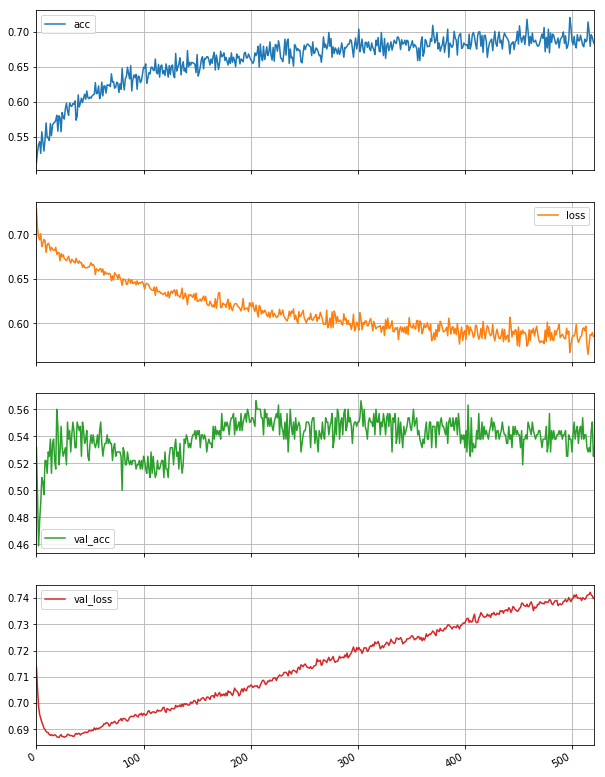

In [24]:
print("accuracy for human feature subtraction " + str(_nn(feat_mat_sub_human, target_val_human_sub)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               2432      
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_8 (Activation)    (None, 1)                 0         
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________
Train on 1264 samples, validate on 316 samples
Epoch 1/10000
1264/1264 [==============================] - 0s 270us/step - loss: 0.7375 - acc

1264/1264 [==============================] - 0s 82us/step - loss: 0.6368 - acc: 0.6432 - val_loss: 0.6842 - val_acc: 0.5823
Epoch 53/10000
1264/1264 [==============================] - 0s 93us/step - loss: 0.6383 - acc: 0.6329 - val_loss: 0.6863 - val_acc: 0.5854
Epoch 54/10000
1264/1264 [==============================] - 0s 96us/step - loss: 0.6373 - acc: 0.6250 - val_loss: 0.6834 - val_acc: 0.5791
Epoch 55/10000
1264/1264 [==============================] - 0s 68us/step - loss: 0.6351 - acc: 0.6337 - val_loss: 0.6890 - val_acc: 0.5791
Epoch 56/10000
1264/1264 [==============================] - 0s 66us/step - loss: 0.6302 - acc: 0.6543 - val_loss: 0.6874 - val_acc: 0.5759
Epoch 57/10000
1264/1264 [==============================] - 0s 50us/step - loss: 0.6388 - acc: 0.6321 - val_loss: 0.6856 - val_acc: 0.5759
Epoch 58/10000
1264/1264 [==============================] - 0s 59us/step - loss: 0.6355 - acc: 0.6392 - val_loss: 0.6917 - val_acc: 0.5696
Epoch 59/10000
1264/1264 [================

Epoch 111/10000
1264/1264 [==============================] - 0s 96us/step - loss: 0.5818 - acc: 0.7002 - val_loss: 0.7058 - val_acc: 0.5854
Epoch 112/10000
1264/1264 [==============================] - 0s 94us/step - loss: 0.5798 - acc: 0.7136 - val_loss: 0.7052 - val_acc: 0.5949
Epoch 113/10000
1264/1264 [==============================] - 0s 81us/step - loss: 0.5788 - acc: 0.7097 - val_loss: 0.7042 - val_acc: 0.5854
Epoch 114/10000
1264/1264 [==============================] - 0s 106us/step - loss: 0.5751 - acc: 0.7128 - val_loss: 0.7002 - val_acc: 0.5981
Epoch 115/10000
1264/1264 [==============================] - 0s 84us/step - loss: 0.5779 - acc: 0.6994 - val_loss: 0.7026 - val_acc: 0.5981
Epoch 116/10000
1264/1264 [==============================] - 0s 80us/step - loss: 0.5763 - acc: 0.7081 - val_loss: 0.7074 - val_acc: 0.5918
Epoch 117/10000
1264/1264 [==============================] - 0s 60us/step - loss: 0.5698 - acc: 0.7136 - val_loss: 0.7013 - val_acc: 0.5918
Epoch 118/10000
126

1264/1264 [==============================] - 0s 70us/step - loss: 0.5404 - acc: 0.7310 - val_loss: 0.7190 - val_acc: 0.5570
Epoch 170/10000
1264/1264 [==============================] - 0s 77us/step - loss: 0.5291 - acc: 0.7373 - val_loss: 0.7175 - val_acc: 0.5665
Epoch 171/10000
1264/1264 [==============================] - 0s 79us/step - loss: 0.5370 - acc: 0.7453 - val_loss: 0.7169 - val_acc: 0.5791
Epoch 172/10000
1264/1264 [==============================] - 0s 74us/step - loss: 0.5242 - acc: 0.7508 - val_loss: 0.7172 - val_acc: 0.5823
Epoch 173/10000
1264/1264 [==============================] - 0s 90us/step - loss: 0.5411 - acc: 0.7247 - val_loss: 0.7153 - val_acc: 0.5823
Epoch 174/10000
1264/1264 [==============================] - 0s 93us/step - loss: 0.5321 - acc: 0.7302 - val_loss: 0.7227 - val_acc: 0.5823
Epoch 175/10000
1264/1264 [==============================] - 0s 61us/step - loss: 0.5270 - acc: 0.7453 - val_loss: 0.7214 - val_acc: 0.5854
Epoch 176/10000
1264/1264 [=========

1264/1264 [==============================] - 0s 62us/step - loss: 0.5092 - acc: 0.7642 - val_loss: 0.7359 - val_acc: 0.5791
Epoch 228/10000
1264/1264 [==============================] - 0s 65us/step - loss: 0.5103 - acc: 0.7468 - val_loss: 0.7351 - val_acc: 0.5728
Epoch 229/10000
1264/1264 [==============================] - 0s 53us/step - loss: 0.5084 - acc: 0.7555 - val_loss: 0.7377 - val_acc: 0.5823
Epoch 230/10000
1264/1264 [==============================] - 0s 89us/step - loss: 0.4934 - acc: 0.7737 - val_loss: 0.7380 - val_acc: 0.5886
Epoch 231/10000
1264/1264 [==============================] - 0s 82us/step - loss: 0.4885 - acc: 0.7777 - val_loss: 0.7354 - val_acc: 0.5728
Epoch 232/10000
1264/1264 [==============================] - 0s 63us/step - loss: 0.4975 - acc: 0.7714 - val_loss: 0.7278 - val_acc: 0.5918
Epoch 233/10000
1264/1264 [==============================] - 0s 75us/step - loss: 0.4953 - acc: 0.7737 - val_loss: 0.7409 - val_acc: 0.5601
Epoch 234/10000
1264/1264 [=========

1264/1264 [==============================] - 0s 79us/step - loss: 0.4745 - acc: 0.7801 - val_loss: 0.7488 - val_acc: 0.5791
Epoch 286/10000
1264/1264 [==============================] - 0s 77us/step - loss: 0.4776 - acc: 0.7785 - val_loss: 0.7514 - val_acc: 0.5791
Epoch 287/10000
1264/1264 [==============================] - 0s 75us/step - loss: 0.4754 - acc: 0.7896 - val_loss: 0.7538 - val_acc: 0.5538
Epoch 288/10000
1264/1264 [==============================] - 0s 62us/step - loss: 0.4746 - acc: 0.7824 - val_loss: 0.7517 - val_acc: 0.5728
Epoch 289/10000
1264/1264 [==============================] - 0s 71us/step - loss: 0.4664 - acc: 0.7809 - val_loss: 0.7522 - val_acc: 0.5854
Epoch 290/10000
1264/1264 [==============================] - 0s 62us/step - loss: 0.4691 - acc: 0.7880 - val_loss: 0.7550 - val_acc: 0.5759
Epoch 291/10000
1264/1264 [==============================] - 0s 61us/step - loss: 0.4795 - acc: 0.7777 - val_loss: 0.7526 - val_acc: 0.5759
Epoch 292/10000
1264/1264 [=========

1264/1264 [==============================] - 0s 60us/step - loss: 0.4588 - acc: 0.7919 - val_loss: 0.7718 - val_acc: 0.5665
Epoch 344/10000
1264/1264 [==============================] - 0s 75us/step - loss: 0.4516 - acc: 0.7935 - val_loss: 0.7765 - val_acc: 0.5665
Epoch 345/10000
1264/1264 [==============================] - 0s 68us/step - loss: 0.4625 - acc: 0.7935 - val_loss: 0.7729 - val_acc: 0.5759
Epoch 346/10000
1264/1264 [==============================] - 0s 51us/step - loss: 0.4531 - acc: 0.7729 - val_loss: 0.7677 - val_acc: 0.5886
Epoch 347/10000
1264/1264 [==============================] - 0s 68us/step - loss: 0.4495 - acc: 0.7801 - val_loss: 0.7705 - val_acc: 0.5886
Epoch 348/10000
1264/1264 [==============================] - 0s 51us/step - loss: 0.4514 - acc: 0.7943 - val_loss: 0.7678 - val_acc: 0.5886
Epoch 349/10000
1264/1264 [==============================] - 0s 52us/step - loss: 0.4435 - acc: 0.7864 - val_loss: 0.7694 - val_acc: 0.5759
Epoch 350/10000
1264/1264 [=========

1264/1264 [==============================] - 0s 64us/step - loss: 0.4374 - acc: 0.7967 - val_loss: 0.7818 - val_acc: 0.5759
Epoch 402/10000
1264/1264 [==============================] - 0s 65us/step - loss: 0.4344 - acc: 0.7959 - val_loss: 0.7940 - val_acc: 0.5696
Epoch 403/10000
1264/1264 [==============================] - 0s 62us/step - loss: 0.4417 - acc: 0.7983 - val_loss: 0.7895 - val_acc: 0.5823
Epoch 404/10000
1264/1264 [==============================] - 0s 70us/step - loss: 0.4382 - acc: 0.7943 - val_loss: 0.7950 - val_acc: 0.5696
Epoch 405/10000
1264/1264 [==============================] - 0s 62us/step - loss: 0.4297 - acc: 0.7927 - val_loss: 0.7871 - val_acc: 0.5823
Epoch 406/10000
1264/1264 [==============================] - 0s 59us/step - loss: 0.4404 - acc: 0.7951 - val_loss: 0.8001 - val_acc: 0.5696
Epoch 407/10000
1264/1264 [==============================] - 0s 55us/step - loss: 0.4573 - acc: 0.7793 - val_loss: 0.7912 - val_acc: 0.5918
Epoch 408/10000
1264/1264 [=========

1264/1264 [==============================] - 0s 61us/step - loss: 0.4317 - acc: 0.8046 - val_loss: 0.8158 - val_acc: 0.5728
Epoch 460/10000
1264/1264 [==============================] - 0s 66us/step - loss: 0.4165 - acc: 0.8109 - val_loss: 0.8162 - val_acc: 0.5538
Epoch 461/10000
1264/1264 [==============================] - 0s 62us/step - loss: 0.4187 - acc: 0.8212 - val_loss: 0.8174 - val_acc: 0.5665
Epoch 462/10000
1264/1264 [==============================] - 0s 65us/step - loss: 0.4331 - acc: 0.8014 - val_loss: 0.8225 - val_acc: 0.5791
Epoch 463/10000
1264/1264 [==============================] - 0s 74us/step - loss: 0.4253 - acc: 0.8085 - val_loss: 0.8119 - val_acc: 0.5823
Epoch 464/10000
1264/1264 [==============================] - 0s 75us/step - loss: 0.4302 - acc: 0.8085 - val_loss: 0.8087 - val_acc: 0.5791
Epoch 465/10000
1264/1264 [==============================] - 0s 74us/step - loss: 0.4173 - acc: 0.8141 - val_loss: 0.8144 - val_acc: 0.5728
Epoch 466/10000
1264/1264 [=========

1264/1264 [==============================] - 0s 66us/step - loss: 0.4180 - acc: 0.8149 - val_loss: 0.8356 - val_acc: 0.5759
Epoch 518/10000
1264/1264 [==============================] - 0s 60us/step - loss: 0.4287 - acc: 0.8022 - val_loss: 0.8323 - val_acc: 0.5759
Epoch 519/10000
1264/1264 [==============================] - 0s 66us/step - loss: 0.4107 - acc: 0.8157 - val_loss: 0.8335 - val_acc: 0.5791
Epoch 520/10000
1264/1264 [==============================] - 0s 47us/step - loss: 0.4012 - acc: 0.8259 - val_loss: 0.8338 - val_acc: 0.5759
Epoch 521/10000
1264/1264 [==============================] - 0s 50us/step - loss: 0.3937 - acc: 0.8236 - val_loss: 0.8377 - val_acc: 0.5823
Epoch 00521: early stopping
316/316 [==============================] - 0s 52us/step
accuracy for human feature concatenation 58.22784810126582


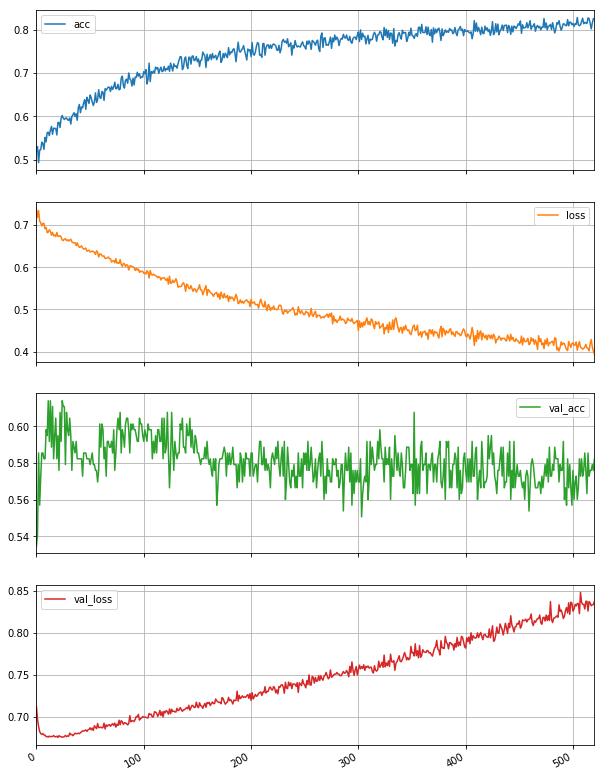

In [26]:
print("accuracy for human feature concatenation " + str(_nn(feat_mat_con_human, target_val_human_con)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
_________________________________________________________________
activation_10 (Activation)   (None, 1)                 0         
Total params: 65,793
Trainable params: 65,793
Non-trainable params: 0
_________________________________________________________________
Train on 3200 samples, validate on 800 samples
Epoch 1/10000
3200/3200 [==============================] - 0s 144us/step - loss: 0.6808 - a

3200/3200 [==============================] - 0s 94us/step - loss: 0.0147 - acc: 0.9994 - val_loss: 0.6547 - val_acc: 0.7712
Epoch 53/10000
3200/3200 [==============================] - 0s 97us/step - loss: 0.0132 - acc: 1.0000 - val_loss: 0.6601 - val_acc: 0.7725
Epoch 54/10000
3200/3200 [==============================] - 0s 94us/step - loss: 0.0127 - acc: 1.0000 - val_loss: 0.6691 - val_acc: 0.7750
Epoch 55/10000
3200/3200 [==============================] - 0s 92us/step - loss: 0.0145 - acc: 0.9994 - val_loss: 0.6756 - val_acc: 0.7762
Epoch 56/10000
3200/3200 [==============================] - 0s 82us/step - loss: 0.0119 - acc: 1.0000 - val_loss: 0.6780 - val_acc: 0.7738
Epoch 57/10000
3200/3200 [==============================] - 0s 98us/step - loss: 0.0139 - acc: 0.9994 - val_loss: 0.6730 - val_acc: 0.7725
Epoch 58/10000
3200/3200 [==============================] - 0s 84us/step - loss: 0.0122 - acc: 0.9994 - val_loss: 0.6783 - val_acc: 0.7750
Epoch 59/10000
3200/3200 [================

Epoch 111/10000
3200/3200 [==============================] - 0s 57us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.8206 - val_acc: 0.7762
Epoch 112/10000
3200/3200 [==============================] - 0s 57us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.8257 - val_acc: 0.7812
Epoch 113/10000
3200/3200 [==============================] - 0s 58us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.8422 - val_acc: 0.7812
Epoch 114/10000
3200/3200 [==============================] - 0s 61us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.8444 - val_acc: 0.7812
Epoch 115/10000
3200/3200 [==============================] - 0s 57us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.8525 - val_acc: 0.7800
Epoch 116/10000
3200/3200 [==============================] - 0s 58us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.8377 - val_acc: 0.7788
Epoch 117/10000
3200/3200 [==============================] - 0s 58us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.8336 - val_acc: 0.7788
Epoch 118/10000
3200

3200/3200 [==============================] - 0s 63us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.9962 - val_acc: 0.7688
Epoch 170/10000
3200/3200 [==============================] - 0s 53us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.9502 - val_acc: 0.7700
Epoch 171/10000
3200/3200 [==============================] - 0s 58us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.9542 - val_acc: 0.7675
Epoch 172/10000
3200/3200 [==============================] - 0s 63us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.9391 - val_acc: 0.7712
Epoch 173/10000
3200/3200 [==============================] - 0s 62us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.9315 - val_acc: 0.7675
Epoch 174/10000
3200/3200 [==============================] - 0s 53us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.9797 - val_acc: 0.7762
Epoch 175/10000
3200/3200 [==============================] - 0s 56us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.9295 - val_acc: 0.7700
Epoch 176/10000
3200/3200 [=========

3200/3200 [==============================] - 0s 66us/step - loss: 9.7523e-04 - acc: 1.0000 - val_loss: 1.0904 - val_acc: 0.7700
Epoch 228/10000
3200/3200 [==============================] - 0s 63us/step - loss: 5.8492e-04 - acc: 1.0000 - val_loss: 1.1078 - val_acc: 0.7500
Epoch 229/10000
3200/3200 [==============================] - 0s 55us/step - loss: 7.1362e-04 - acc: 1.0000 - val_loss: 1.1077 - val_acc: 0.7612
Epoch 230/10000
3200/3200 [==============================] - 0s 64us/step - loss: 8.3606e-04 - acc: 0.9997 - val_loss: 1.1240 - val_acc: 0.7625
Epoch 231/10000
3200/3200 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.1143 - val_acc: 0.7662
Epoch 232/10000
3200/3200 [==============================] - 0s 66us/step - loss: 9.9262e-04 - acc: 1.0000 - val_loss: 1.0920 - val_acc: 0.7662
Epoch 233/10000
3200/3200 [==============================] - 0s 69us/step - loss: 8.0290e-04 - acc: 1.0000 - val_loss: 1.0967 - val_acc: 0.7612
Epoch 234/10

3200/3200 [==============================] - 0s 62us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 1.1167 - val_acc: 0.7675
Epoch 285/10000
3200/3200 [==============================] - 0s 59us/step - loss: 7.1858e-04 - acc: 1.0000 - val_loss: 1.1507 - val_acc: 0.7712
Epoch 286/10000
3200/3200 [==============================] - 0s 64us/step - loss: 8.4811e-04 - acc: 1.0000 - val_loss: 1.1927 - val_acc: 0.7700
Epoch 287/10000
3200/3200 [==============================] - 0s 51us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 1.1642 - val_acc: 0.7688
Epoch 288/10000
3200/3200 [==============================] - 0s 53us/step - loss: 3.6883e-04 - acc: 1.0000 - val_loss: 1.1612 - val_acc: 0.7712
Epoch 289/10000
3200/3200 [==============================] - 0s 56us/step - loss: 5.2484e-04 - acc: 1.0000 - val_loss: 1.1827 - val_acc: 0.7675
Epoch 290/10000
3200/3200 [==============================] - 0s 65us/step - loss: 4.6015e-04 - acc: 1.0000 - val_loss: 1.1813 - val_acc: 0.7738
Epoch 291/10000


Epoch 342/10000
3200/3200 [==============================] - 0s 62us/step - loss: 7.0656e-04 - acc: 1.0000 - val_loss: 1.2201 - val_acc: 0.7700
Epoch 343/10000
3200/3200 [==============================] - 0s 58us/step - loss: 0.0015 - acc: 0.9994 - val_loss: 1.2514 - val_acc: 0.7588
Epoch 344/10000
3200/3200 [==============================] - 0s 63us/step - loss: 9.8563e-04 - acc: 0.9997 - val_loss: 1.2646 - val_acc: 0.7662
Epoch 345/10000
3200/3200 [==============================] - 0s 62us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 1.2414 - val_acc: 0.7500
Epoch 346/10000
3200/3200 [==============================] - 0s 63us/step - loss: 8.4032e-04 - acc: 1.0000 - val_loss: 1.2702 - val_acc: 0.7562
Epoch 347/10000
3200/3200 [==============================] - 0s 57us/step - loss: 4.2170e-04 - acc: 1.0000 - val_loss: 1.3054 - val_acc: 0.7588
Epoch 348/10000
3200/3200 [==============================] - 0s 68us/step - loss: 2.8137e-04 - acc: 1.0000 - val_loss: 1.2776 - val_acc: 0.7675


3200/3200 [==============================] - 0s 65us/step - loss: 1.7577e-04 - acc: 1.0000 - val_loss: 1.2993 - val_acc: 0.7738
Epoch 400/10000
3200/3200 [==============================] - 0s 52us/step - loss: 2.4151e-04 - acc: 1.0000 - val_loss: 1.3394 - val_acc: 0.7725
Epoch 401/10000
3200/3200 [==============================] - 0s 62us/step - loss: 2.2249e-04 - acc: 1.0000 - val_loss: 1.2904 - val_acc: 0.7700
Epoch 402/10000
3200/3200 [==============================] - 0s 58us/step - loss: 9.6341e-04 - acc: 0.9997 - val_loss: 1.4293 - val_acc: 0.7625
Epoch 403/10000
3200/3200 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9997 - val_loss: 1.3584 - val_acc: 0.7675
Epoch 404/10000
3200/3200 [==============================] - 0s 55us/step - loss: 5.6231e-04 - acc: 1.0000 - val_loss: 1.4507 - val_acc: 0.7512
Epoch 405/10000
3200/3200 [==============================] - 0s 62us/step - loss: 6.3156e-04 - acc: 1.0000 - val_loss: 1.3420 - val_acc: 0.7625
Epoch 406/10

3200/3200 [==============================] - 0s 62us/step - loss: 4.7165e-04 - acc: 1.0000 - val_loss: 1.3796 - val_acc: 0.7662
Epoch 457/10000
3200/3200 [==============================] - 0s 61us/step - loss: 3.5430e-04 - acc: 1.0000 - val_loss: 1.4084 - val_acc: 0.7712
Epoch 458/10000
3200/3200 [==============================] - 0s 57us/step - loss: 3.3620e-04 - acc: 1.0000 - val_loss: 1.4025 - val_acc: 0.7775
Epoch 459/10000
3200/3200 [==============================] - 0s 58us/step - loss: 3.2545e-04 - acc: 1.0000 - val_loss: 1.3713 - val_acc: 0.7725
Epoch 460/10000
3200/3200 [==============================] - 0s 63us/step - loss: 6.5865e-04 - acc: 1.0000 - val_loss: 1.4920 - val_acc: 0.7675
Epoch 461/10000
3200/3200 [==============================] - 0s 58us/step - loss: 7.5856e-04 - acc: 0.9997 - val_loss: 1.4610 - val_acc: 0.7688
Epoch 462/10000
3200/3200 [==============================] - 0s 54us/step - loss: 3.1378e-04 - acc: 1.0000 - val_loss: 1.4586 - val_acc: 0.7712
Epoch 46

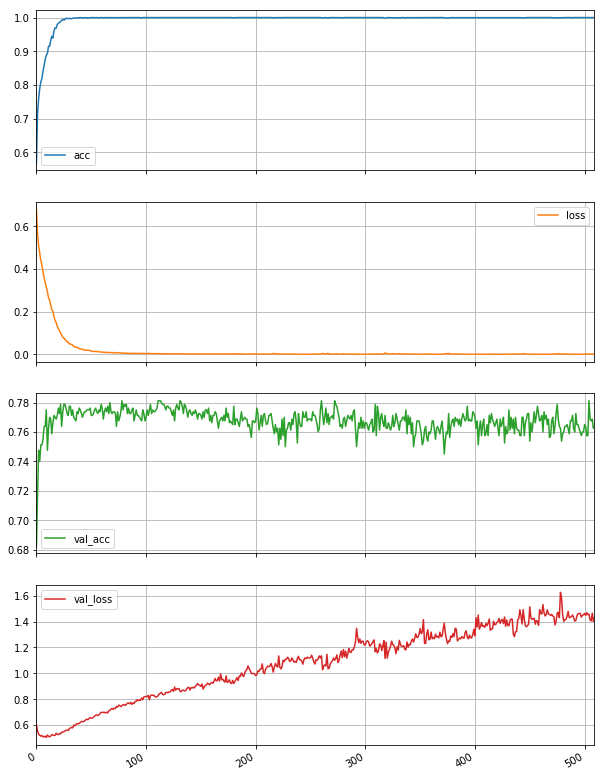

In [27]:
print("accuracy for gsc feature subtraction " + str(_nn(feat_mat_sub_gsc, target_val_gsc_sub)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               131200    
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
_________________________________________________________________
activation_12 (Activation)   (None, 1)                 0         
Total params: 131,329
Trainable params: 131,329
Non-trainable params: 0
_________________________________________________________________
Train on 3200 samples, validate on 800 samples
Epoch 1/10000
3200/3200 [==============================] - 1s 234us/step - loss: 0.7133 -

3200/3200 [==============================] - 0s 129us/step - loss: 0.0075 - acc: 0.9997 - val_loss: 0.7962 - val_acc: 0.7475
Epoch 53/10000
3200/3200 [==============================] - 0s 136us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 0.8029 - val_acc: 0.7438
Epoch 54/10000
3200/3200 [==============================] - 0s 130us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 0.8235 - val_acc: 0.7538
Epoch 55/10000
3200/3200 [==============================] - 0s 136us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 0.8253 - val_acc: 0.7512
Epoch 56/10000
3200/3200 [==============================] - 0s 131us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 0.8361 - val_acc: 0.7475
Epoch 57/10000
3200/3200 [==============================] - 0s 134us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 0.8280 - val_acc: 0.7512
Epoch 58/10000
3200/3200 [==============================] - 0s 131us/step - loss: 0.0060 - acc: 1.0000 - val_loss: 0.8275 - val_acc: 0.7412
Epoch 59/10000
3200/3200 [=========

3200/3200 [==============================] - 0s 127us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.9998 - val_acc: 0.7512
Epoch 111/10000
3200/3200 [==============================] - 0s 135us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.0070 - val_acc: 0.7412
Epoch 112/10000
3200/3200 [==============================] - 0s 136us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.0447 - val_acc: 0.7362
Epoch 113/10000
3200/3200 [==============================] - 0s 130us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.9856 - val_acc: 0.7388
Epoch 114/10000
3200/3200 [==============================] - 0s 135us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.0362 - val_acc: 0.7388
Epoch 115/10000
3200/3200 [==============================] - 0s 134us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.0426 - val_acc: 0.7400
Epoch 116/10000
3200/3200 [==============================] - 0s 134us/step - loss: 0.0016 - acc: 0.9997 - val_loss: 1.0584 - val_acc: 0.7450
Epoch 117/10000
3200/3200 [==

3200/3200 [==============================] - 0s 136us/step - loss: 4.8956e-04 - acc: 1.0000 - val_loss: 1.2430 - val_acc: 0.7438
Epoch 169/10000
3200/3200 [==============================] - 0s 136us/step - loss: 4.1965e-04 - acc: 1.0000 - val_loss: 1.2351 - val_acc: 0.7438
Epoch 170/10000
3200/3200 [==============================] - 0s 132us/step - loss: 5.2155e-04 - acc: 1.0000 - val_loss: 1.2014 - val_acc: 0.7462
Epoch 171/10000
3200/3200 [==============================] - 0s 131us/step - loss: 5.9919e-04 - acc: 1.0000 - val_loss: 1.2226 - val_acc: 0.7375
Epoch 172/10000
3200/3200 [==============================] - 0s 131us/step - loss: 4.9069e-04 - acc: 1.0000 - val_loss: 1.2298 - val_acc: 0.7438
Epoch 173/10000
3200/3200 [==============================] - 0s 135us/step - loss: 7.2079e-04 - acc: 1.0000 - val_loss: 1.2517 - val_acc: 0.7438
Epoch 174/10000
3200/3200 [==============================] - 0s 124us/step - loss: 6.2179e-04 - acc: 1.0000 - val_loss: 1.2720 - val_acc: 0.7350
E

3200/3200 [==============================] - 0s 130us/step - loss: 8.4784e-04 - acc: 0.9997 - val_loss: 1.3560 - val_acc: 0.7375
Epoch 226/10000
3200/3200 [==============================] - 0s 130us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.3702 - val_acc: 0.7262
Epoch 227/10000
3200/3200 [==============================] - 0s 127us/step - loss: 9.4273e-04 - acc: 1.0000 - val_loss: 1.3449 - val_acc: 0.7375
Epoch 228/10000
3200/3200 [==============================] - 0s 132us/step - loss: 7.1356e-04 - acc: 1.0000 - val_loss: 1.2904 - val_acc: 0.7425
Epoch 229/10000
3200/3200 [==============================] - 0s 129us/step - loss: 6.2970e-04 - acc: 1.0000 - val_loss: 1.2796 - val_acc: 0.7475
Epoch 230/10000
3200/3200 [==============================] - 0s 130us/step - loss: 5.0233e-04 - acc: 1.0000 - val_loss: 1.3395 - val_acc: 0.7350
Epoch 231/10000
3200/3200 [==============================] - 0s 136us/step - loss: 5.2937e-04 - acc: 1.0000 - val_loss: 1.3201 - val_acc: 0.7425
Epoch

Epoch 282/10000
3200/3200 [==============================] - 0s 135us/step - loss: 0.0155 - acc: 0.9956 - val_loss: 1.2902 - val_acc: 0.7400
Epoch 283/10000
3200/3200 [==============================] - 0s 136us/step - loss: 0.0280 - acc: 0.9900 - val_loss: 1.1777 - val_acc: 0.7362
Epoch 284/10000
3200/3200 [==============================] - 0s 129us/step - loss: 0.0152 - acc: 0.9962 - val_loss: 1.4698 - val_acc: 0.7025
Epoch 285/10000
3200/3200 [==============================] - 0s 126us/step - loss: 0.0130 - acc: 0.9959 - val_loss: 1.1568 - val_acc: 0.7512
Epoch 286/10000
3200/3200 [==============================] - 0s 129us/step - loss: 0.0079 - acc: 0.9978 - val_loss: 1.2383 - val_acc: 0.7512
Epoch 287/10000
3200/3200 [==============================] - 0s 140us/step - loss: 0.0069 - acc: 0.9978 - val_loss: 1.3090 - val_acc: 0.7350
Epoch 288/10000
3200/3200 [==============================] - 0s 130us/step - loss: 0.0051 - acc: 0.9988 - val_loss: 1.3404 - val_acc: 0.7375
Epoch 289/100

3200/3200 [==============================] - 0s 136us/step - loss: 1.3073e-04 - acc: 1.0000 - val_loss: 1.5429 - val_acc: 0.7438
Epoch 340/10000
3200/3200 [==============================] - 0s 135us/step - loss: 1.9750e-04 - acc: 1.0000 - val_loss: 1.5426 - val_acc: 0.7438
Epoch 341/10000
3200/3200 [==============================] - 0s 130us/step - loss: 4.2764e-04 - acc: 1.0000 - val_loss: 1.5012 - val_acc: 0.7488
Epoch 342/10000
3200/3200 [==============================] - 0s 129us/step - loss: 1.5708e-04 - acc: 1.0000 - val_loss: 1.5129 - val_acc: 0.7450
Epoch 343/10000
3200/3200 [==============================] - 0s 137us/step - loss: 2.1561e-04 - acc: 1.0000 - val_loss: 1.5403 - val_acc: 0.7450
Epoch 344/10000
3200/3200 [==============================] - 0s 132us/step - loss: 2.4147e-04 - acc: 1.0000 - val_loss: 1.5015 - val_acc: 0.7488
Epoch 345/10000
3200/3200 [==============================] - 0s 131us/step - loss: 2.1592e-04 - acc: 1.0000 - val_loss: 1.4865 - val_acc: 0.7538
E

3200/3200 [==============================] - 0s 137us/step - loss: 0.0044 - acc: 0.9984 - val_loss: 1.5101 - val_acc: 0.7450
Epoch 397/10000
3200/3200 [==============================] - 0s 139us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.5130 - val_acc: 0.7438
Epoch 398/10000
3200/3200 [==============================] - 0s 131us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 1.5989 - val_acc: 0.7450
Epoch 399/10000
3200/3200 [==============================] - 0s 135us/step - loss: 0.0010 - acc: 0.9997 - val_loss: 1.5546 - val_acc: 0.7525
Epoch 400/10000
3200/3200 [==============================] - 0s 141us/step - loss: 0.0013 - acc: 0.9997 - val_loss: 1.6527 - val_acc: 0.7488
Epoch 401/10000
3200/3200 [==============================] - 0s 140us/step - loss: 0.0024 - acc: 0.9991 - val_loss: 1.6477 - val_acc: 0.7362
Epoch 402/10000
3200/3200 [==============================] - 0s 136us/step - loss: 0.0033 - acc: 0.9988 - val_loss: 1.6238 - val_acc: 0.7525
Epoch 403/10000
3200/3200 [==

3200/3200 [==============================] - 0s 142us/step - loss: 5.7860e-04 - acc: 0.9997 - val_loss: 1.6118 - val_acc: 0.7612
Epoch 454/10000
3200/3200 [==============================] - 0s 133us/step - loss: 0.0020 - acc: 0.9991 - val_loss: 1.6470 - val_acc: 0.7425
Epoch 455/10000
3200/3200 [==============================] - 0s 131us/step - loss: 7.4165e-04 - acc: 1.0000 - val_loss: 1.5595 - val_acc: 0.7562
Epoch 456/10000
3200/3200 [==============================] - 0s 133us/step - loss: 3.1390e-04 - acc: 1.0000 - val_loss: 1.5679 - val_acc: 0.7538
Epoch 457/10000
3200/3200 [==============================] - 0s 129us/step - loss: 3.5327e-04 - acc: 1.0000 - val_loss: 1.5841 - val_acc: 0.7550
Epoch 458/10000
3200/3200 [==============================] - 0s 129us/step - loss: 1.1031e-04 - acc: 1.0000 - val_loss: 1.5888 - val_acc: 0.7562
Epoch 459/10000
3200/3200 [==============================] - 0s 141us/step - loss: 3.0006e-04 - acc: 1.0000 - val_loss: 1.6454 - val_acc: 0.7525
Epoch

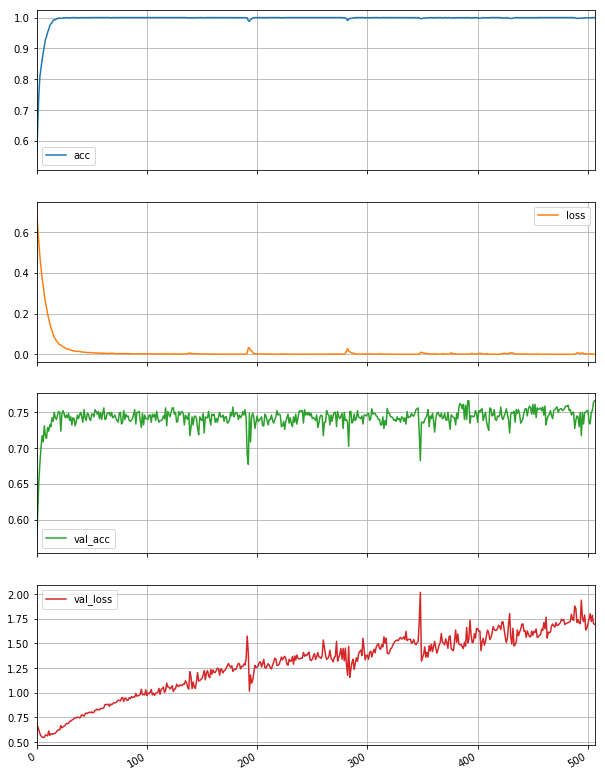

In [28]:
print("accuracy for gsc feature concatenation " + str(_nn(feat_mat_con_gsc, target_val_gsc_con)))